# Lab 6.4: Regression Diagnostics

**Question 1**

Using the data in https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv :

1) Run a multiple regression model of $y$ against all the $x$ variables and then produce the residuals and fitted values. Create the residual diagnostic plot of residuals on the Y axis against the fitted values on the X axis. 

2) Is the linearity assumption met?  

3) Test for non-Normality.  

4) Test for heteroskedasticity. 

Q1. 1)

In [66]:
%pylab inline

import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sms
from statsmodels.formula.api import ols

homer = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv')

Populating the interactive namespace from numpy and matplotlib


In [67]:
homer = homer.dropna()
homer.describe()

,y,x1,x2,x3,x4,x5,x6
count,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000,6054.000000
mean,-0.008547,-0.000027,0.000006,-0.000029,0.000056,0.000028,-0.001640
std,1.202365,0.033310,0.080791,0.058493,0.156617,0.119564,0.784653
min,-3.810000,-0.104170,-0.303830,-0.199880,-0.633240,-0.479130,-2.903200
25%,-0.879910,-0.021885,-0.054038,-0.039078,-0.109588,-0.081435,-0.535820
50%,-0.066951,-0.000128,0.000113,0.000168,-0.000134,-0.000773,-0.018369
75%,0.929407,0.022538,0.055230,0.038944,0.107017,0.079743,0.514525
max,4.035900,0.112820,0.292970,0.199290,0.533080,0.454490,3.619300


In [68]:
model1 = ols('y~ x1 + x2 + x3 + x4 + x5 + x6', data=homer)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     452.1
Date:                Sun, 09 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:18:44   Log-Likelihood:                -8583.7
No. Observations:                6054   AIC:                         1.718e+04
Df Residuals:                    6047   BIC:                         1.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0069      0.013     -0.534      0.593        -0.032     0.018
x1             4.0686      0.508      8.015      0.000         3.073     5.064
x2             1.1412      0.257      4.442      0.000         0.638     1.645
x3             4.0318      0.358     11.249      0.000         3.329     4.734
x4             0.9373      0.127      7.362      0.000         0.688     1.187
x5             3.9840      0.171     23.316      0.000         3.649     4.319
x6             0.9967      0.022     44.744      0.000         0.953     1.040
==============================================================================
Omnibus:                      635.831   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.770
Skew:                           0.070   Prob(JB):                     7.54e-41
Kurtosis:                       2.156   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

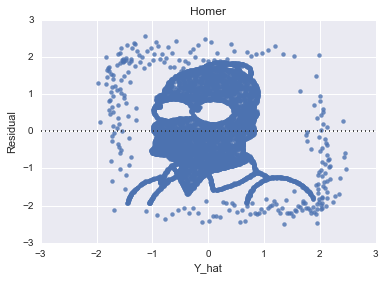

In [69]:
sns.residplot(results1.fittedvalues, results1.resid)
plt.title('Homer')
plt.ylabel('Residual')
plt.xlabel('Y_hat');

2)
>No, the linearlity assumption is not met because there's an obvious pattern - it's not a cloud of evenly distributed points above and below 0
* No obvious pattern  
* Residuals unrelated to $X$  

3) Test for non-normality:
>Graphical Methods:
* Histogram of residuals
* Normal Q-Q plot

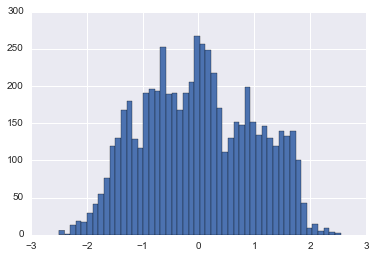

In [70]:
#historgram of residuals
hist(results1.resid, bins = 50);

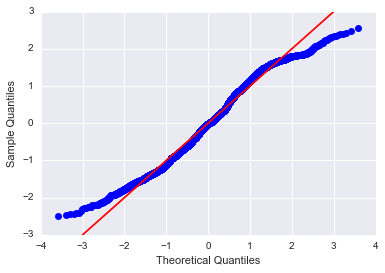

In [71]:
from statsmodels.graphics.gofplots import qqplot

# There are various ways of standardizing the residuals 
# We will use the pearson residuals as the standardized residuals here
sres1 = results1.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

based on the graphs, the normality assumption is not met.  Also, the Prob(JB):	7.54e-41, so we reject the null hypothesis that the residuals are normal.

Hence, model fails normality assumption.

4) Test for heteroskedasticity.

#### Testing for Heteroskedasticity  

There are also numerical tests for heteroskedasticity.  

$H_0$: constant variance  

$H_1$: non-constant variance  

A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [72]:
from statsmodels.stats.diagnostic import het_breushpagan

het_breushpagan(results1.resid, results1.model.exog) # the second output gives the p-value of the test

(53.18148641590016,
 1.0785837820695295e-09,
 8.9317939885747073,
 9.8721073719605556e-10)

based on the results2 test, the p-value is  1.0785837820695295e-09, so we reject the null hypothesis, and so we have evidence to suggest that there is non-constant variance.

Hence, the model fails the Homoscedasticity assumption.

**Question 2**

You are given data about the Scottish Hill Climb races in the table `hills` which consists of 4 columns:

```
Race:     The name of the race (PK)
Distance: The distance of the race in miles
Climb:    Elevation climbed during race in feet
Time:     Record time for race in minutes
```

1) Explore the data with a scatter matrix and a correlation plot (`statsmodels.graphics.plot_corr`).  

   Build a multiple regression model to predict `Time` based on `Distance` and `Time`.
   

In [73]:
%pylab inline

import pandas as pd
import seaborn as sns
import yaml
from statsmodels.graphics.gofplots import qqplot
from sqlalchemy import create_engine

from statsmodels.stats.diagnostic import het_breushpagan
from statsmodels.graphics.correlation import plot_corr
from statsmodels.graphics.regressionplots import plot_leverage_resid2

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

hills = pd.read_sql("SELECT * FROM hills", engine)
hills.head()

Populating the interactive namespace from numpy and matplotlib


,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267


In [74]:
hills.describe()

,Distance,Climb,Time
count,35.000000,35.000000,35.000000
mean,7.528571,1815.314286,57.875714
std,5.523936,1619.150536,50.040716
min,2.000000,300.000000,15.950000
25%,4.500000,725.000000,28.000000
50%,6.000000,1000.000000,39.750000
75%,8.000000,2200.000000,68.625000
max,28.000000,7500.000000,204.617000


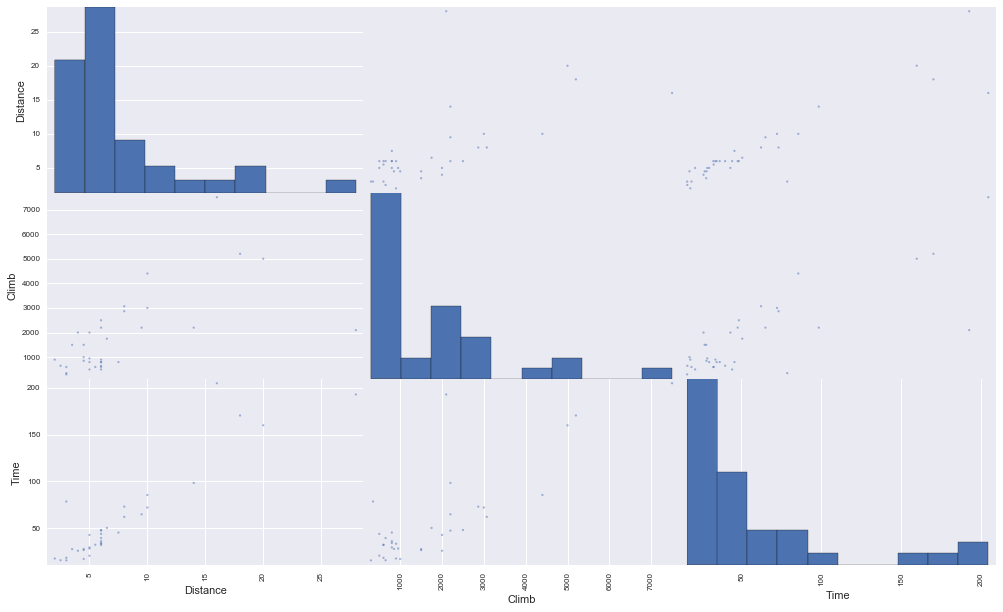

In [75]:
pd.scatter_matrix(hills, figsize=(17, 10), edgecolor='none', alpha=0.5);

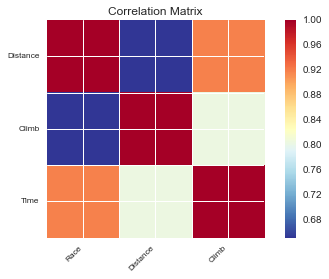

In [76]:
sm.graphics.correlation.plot_corr(hills.corr(), xnames = hills.columns.tolist());

In [123]:
X2 = hills[['Distance', 'Climb']]
X2 = sms.add_constant(X2)
y2 = hills['Time']

model2 = sms.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           3.40e-18
Time:                        15:53:49   Log-Likelihood:                -142.11
No. Observations:                  35   AIC:                             290.2
Df Residuals:                      32   BIC:                             294.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -8.9920      4.303     -2.090      0.045       -17.756    -0.228
Distance       6.2180      0.601     10.343      0.000         4.993     7.442
Climb          0.0110      0.002      5.387      0.000         0.007     0.015
==============================================================================
Omnibus:                       47.910   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.976
Skew:                           3.026   Prob(JB):                     1.56e-51
Kurtosis:                      14.127   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2) Interpret the coefficients of your model. 
>Based on the OLS result, the coefficient;
* For every unit of distance, time increases by 6.2180 units.
* For every unit of climb, time increses by 0.0110 units.

3) Plot the fitted values of the response (`Time`) against the standardized residuals of the model.

   **Hint:**
   - Use `model.fittedvalues` to get fitted values and `model.resid_pearson` to get the standardized residuals
 
   Does the residual plot appear to fulfill the following assumptions:
   - Linearity
   - Normality
   - Homoscedasticity 
   
   What are the consequences if those assumptions are not met ? 


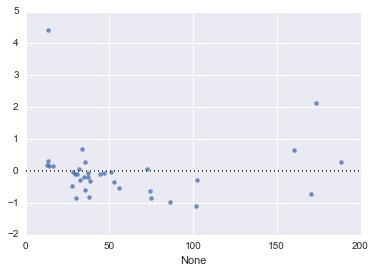

In [124]:
sns.residplot(results2.fittedvalues, results2.resid_pearson, hills);

>There is no linearity.

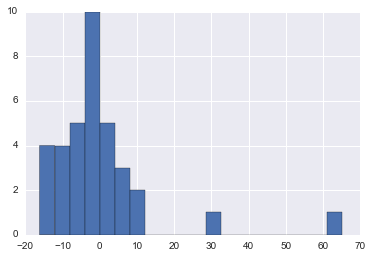

In [125]:
res1 = results2.resid
hist(res1, bins = 20);

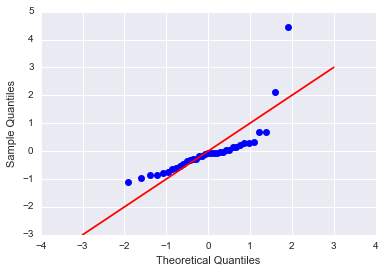

In [126]:
sres1 = results2.resid_pearson
qqplot(sres1)
q = linspace(-3, 3)
plot(q, q, color='r');

>The shape is non-Normality.

>Numerical method for normality.
* H0  : data is Normally distributed.
* Ha  : data is not Normally distributed.
<br>
A small p-value indicates violation of the Normality assumption.
<br>
>>Based on the OLS model;
>>* Jarque-Bera (JB): 233.976
>>* Prob(JB): 1.56e-51
<br>
The p-value for the Normality test is 1.56e-51, which shows evidence of non-Normality.

>Numerical tests for heteroskedasticity.
* H0 : constant variance
* H1 : non-constant variance
<br>
A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [127]:
het_breushpagan(results2.resid, results2.model.exog)

(0.3639464134894832,
 0.83362367560844775,
 0.16812373272512898,
 0.84599098763414304)

>The p-value of 0.83362367560844775 is greater than 0.05, so we would reject heteroskedasticity.

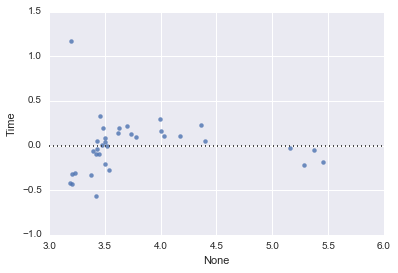

In [129]:
log_y2 = np.log(y2)
model2_log = sms.OLS(log_y2, X2)
results2_log = model2_log.fit()

sns.residplot(results2_log.fittedvalues, log_y2, hills);

>Linearity is improved. 
>>We visually confirm non homoscedasticity: the variance of small values of the fitted values is higher than the variance of the higher fitted values.

In [130]:
het_breushpagan(results2_log.resid, results2_log.model.exog)

(2.1357771585668122,
 0.34373351782945255,
 1.0398065611332974,
 0.36516164777824511)

>The p-value of 0.34373351782945255 is greater than 0.05, so we would reject heteroskedasticity.

4) An additional test for Normality of the residuals is the Q-Q plot. If the quantiles of the residuals match that of a Normal distribution, then the residuals are normally distribution. 

   Import the qq-plot function from statsmodels `from statsmodels.graphics.gofplots import qqplot`.
   
   Draw a straight line where the quantiles of the residuals are the same as those of a standard Normal distribution.
   
   The plot you produce should look similar to the one below:
   
   ![](images/qq.png)
   
   Do the residuals appear to be Normal ?
  
   

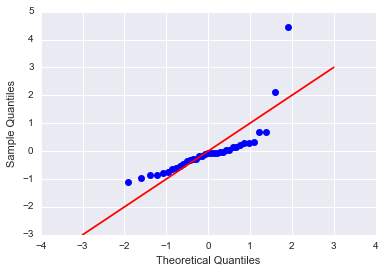

In [131]:
sres2 = results2.resid_pearson
qqplot(sres2)
q = linspace(-3, 3)
plot(q, q, color='r');

>No, not appear to br Normal.

5) (Extra Credit) To identify outliers, one can also look at the leverage-residual plot. 

   Explain what leverage means and how is leverage computed. Is a data point influential if the residual is large but the leverage is low? What about if the residual and leverage are both high?
   
   Import the leverage-residual plot from statsmodels by `from statsmodels.graphics.regressionplots import plot_leverage_resid2`. You can call it by just feeding in the fitted model.
   
   ```python
   plot_leverage_resid2(model)
   ```
   
   Identify the races where the leverage and residual are high. Comment on the commonalities between those races.
   
   

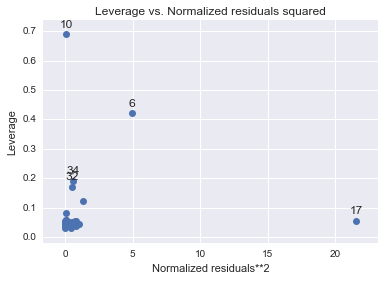

In [133]:
plot_leverage_resid2(results2);

There is some outlier; 6, 10 and 17.

6) (Extra Credit) What are the precautions you need to bare in mind if you were to remove the outliers you have identified in `5.` ?
   
   Remove the outliers in the dataset and re-run the model. 
   
   Plot the residual plot and Q-Q plot as you have done previously. Comment on the plots.
   
   Also comment on the fit of the model to the data relative to the first model.

In [135]:
hills_new = hills[(hills.index != 6) & (hills.index != 10) & (hills.index != 17)]
hills_new.head(n=10)

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267
5,Goatfell,8.0,2866,73.217
7,Cairnpapple,6.0,800,36.367
8,Scolty,5.0,800,29.750
9,Traprain,6.0,650,39.750
11,Dollar,5.0,2000,43.050


In [136]:
X21 = hills_new[['Distance', 'Climb']]
X21 = sms.add_constant(X21)
y21 = hills_new['Time']

model21 = sms.OLS(y21, X21)
results21 = model21.fit()
results21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     544.1
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           1.02e-23
Time:                        16:01:20   Log-Likelihood:                -101.92
No. Observations:                  32   AIC:                             209.8
Df Residuals:                      29   BIC:                             214.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -10.7171      2.147     -4.992      0.000       -15.108    -6.326
Distance       6.8377      0.467     14.647      0.000         5.883     7.792
Climb          0.0077      0.001      5.374      0.000         0.005     0.011
==============================================================================
Omnibus:                        5.917   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.255
Skew:                           0.778   Prob(JB):                        0.119
Kurtosis:                       3.879   Cond. No.                     4.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>The model is 97.4% of the variation in Time.
<br>
The value of Adj. R-squared is greater than original model(0.914). 
<br>
F-statistic is also greater than original model, and p-value is smaller.

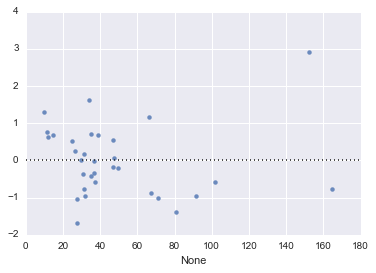

In [137]:
sns.residplot(results21.fittedvalues, results21.resid_pearson, hills_new);

>It shows a kind of linearity.

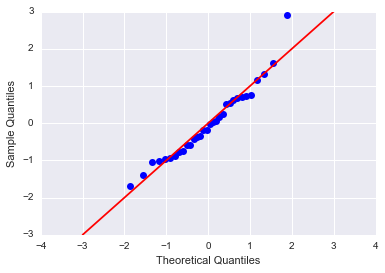

In [138]:
sres2 = results21.resid_pearson
qqplot(sres2)
q = linspace(-3, 3)
plot(q, q, color='r');

>The normality is improved.

**Question 3**

You are given the price and features of some used cars in the tables `car_price` and `car_type`. Car company X want you to build a model to predict car price based on some given features about the car.

1) Explore the dataset with a correlation matrix. You should select only numeric columns when you are constructing the correlation matrix.  
   ```python
   numerics_only = car_price.select_dtypes(['int64', 'float64'])
   sm.graphics.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist())
   ```

   Which 2 variables are strongly multicollinear with each other based on your observation of the correlation matrix ?
   
   Which one would you choose to put in the model and why (subjective answer).

In [78]:
car_price = pd.read_sql("SELECT * FROM car_price", engine)
car_type = pd.read_sql("SELECT * FROM car_type", engine)
car = pd.read_sql("SELECT * FROM car_price JOIN car_type USING (make, model, trim)", engine)

In [79]:
print(car_price.shape)
print(car_type.shape)

(804, 9)
(78, 7)


In [80]:
car.head()

,make,model,trim,car_id,price,mileage,cruise,sound,leather,type,cylinder,liter,doors
0,Buick,Century,Sedan 4D,0,17314.103129,8221,1,1,1,Sedan,6,3.1,4
1,Buick,Century,Sedan 4D,1,17542.036083,9135,1,1,0,Sedan,6,3.1,4
2,Buick,Century,Sedan 4D,2,16218.847862,13196,1,1,0,Sedan,6,3.1,4
3,Buick,Century,Sedan 4D,3,16336.913140,16342,1,0,0,Sedan,6,3.1,4
4,Buick,Century,Sedan 4D,4,16339.170324,19832,1,0,1,Sedan,6,3.1,4


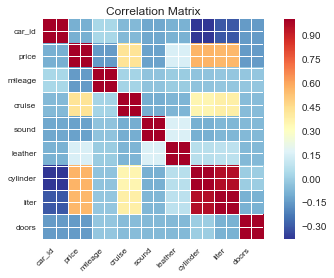

In [81]:
numerics_only = car.select_dtypes(['int64', 'float64'])
sm.graphics.correlation.plot_corr(numerics_only.corr(), xnames=numerics_only.columns.tolist());

In [82]:
numerics_only.corr()

,car_id,price,mileage,cruise,sound,leather,cylinder,liter,doors
car_id,1.000000,-0.089778,0.035162,-0.060988,-0.109941,-0.081113,-0.374327,-0.296516,-0.140653
price,-0.089778,1.000000,-0.143051,0.430851,-0.124348,0.157197,0.569086,0.558146,-0.138750
mileage,0.035162,-0.143051,1.000000,0.025037,-0.026146,0.001005,-0.029461,-0.018641,-0.016944
cruise,-0.060988,0.430851,0.025037,1.000000,-0.091730,-0.070573,0.354285,0.377509,-0.047674
sound,-0.109941,-0.124348,-0.026146,-0.091730,1.000000,0.165444,-0.089704,-0.065527,-0.062530
leather,-0.081113,0.157197,0.001005,-0.070573,0.165444,1.000000,0.075520,0.087332,-0.061969
cylinder,-0.374327,0.569086,-0.029461,0.354285,-0.089704,0.075520,1.000000,0.957897,0.002206
liter,-0.296516,0.558146,-0.018641,0.377509,-0.065527,0.087332,0.957897,1.000000,-0.079259
doors,-0.140653,-0.138750,-0.016944,-0.047674,-0.062530,-0.061969,0.002206,-0.079259,1.000000


>cylinder and liter are highly correlated. We will remove cylinder.

2) Fit a multiple regression model with all the available features to predict price. Check all the assumptions made about the model as you have done previously. Comment on the Q-Q plot and the residual plot.

   

In [83]:
X3 = car[['mileage','cruise','sound','leather','cylinder', 'liter','doors']]
X3= sms.add_constant(X3)
y = car.price

model3 = sms.OLS(y,X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     91.64
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           8.80e-98
Time:                        15:18:57   Log-Likelihood:                -8298.5
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     796   BIC:                         1.665e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6758.7551   1876.967      3.601      0.000      3074.365  1.04e+04
mileage       -0.1697      0.032     -5.326      0.000        -0.232    -0.107
cruise      6288.9971    657.992      9.558      0.000      4997.392  7580.602
sound      -1993.7953    571.776     -3.487      0.001     -3116.162  -871.429
leather     3349.3616    597.681      5.604      0.000      2176.144  4522.579
cylinder    3792.3789    683.180      5.551      0.000      2451.332  5133.426
liter       -787.2207    867.062     -0.908      0.364     -2489.218   914.777
doors      -1542.7458    320.456     -4.814      0.000     -2171.784  -913.708
==============================================================================
Omnibus:                      135.077   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.476
Skew:                           1.054   Prob(JB):                     6.63e-50
Kurtosis:                       4.523   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

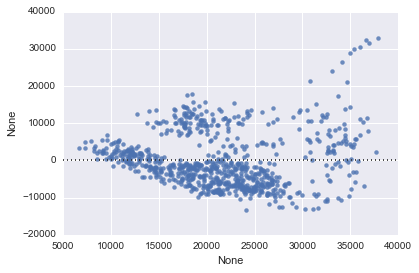

In [84]:
sns.residplot(results3.fittedvalues, results3.resid);

>The residual plot shows no linearity.

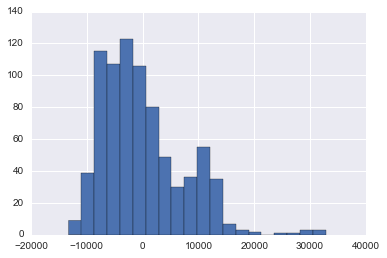

In [85]:
res3 = results3.resid
hist(res3, bins=20);

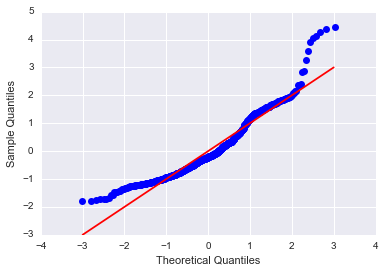

In [86]:
sres3 = results3.resid_pearson
qqplot(sres3)
q = linspace(-3, 3)
plot(q, q, color='r')
show()

>It shows non Normality.

3) One of the remedies to heteroskedastic residuals is to take the log of the response. Log the response and re-run the model and check the assumptions again.

   

In [87]:
log_y = np.log(y)

model_log = sms.OLS(log_y, X3)
results_log = model_log.fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 09 Oct 2016   Prob (F-statistic):          1.18e-110
Time:                        15:19:02   Log-Likelihood:                -155.94
No. Observations:                 804   AIC:                             327.9
Df Residuals:                     796   BIC:                             365.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.2507      0.075    123.331      0.000         9.103     9.398
mileage    -7.451e-06   1.27e-06     -5.849      0.000     -9.95e-06 -4.95e-06
cruise         0.3134      0.026     11.918      0.000         0.262     0.365
sound         -0.0899      0.023     -3.936      0.000        -0.135    -0.045
leather        0.1194      0.024      5.001      0.000         0.073     0.166
cylinder       0.0774      0.027      2.834      0.005         0.024     0.131
liter          0.0702      0.035      2.027      0.043         0.002     0.138
doors         -0.0300      0.013     -2.346      0.019        -0.055    -0.005
==============================================================================
Omnibus:                       47.642   Durbin-Watson:                   0.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.965
Skew:                           0.554   Prob(JB):                     3.84e-11
Kurtosis:                       2.550   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

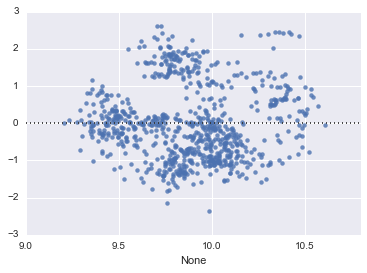

In [88]:
sns.residplot(results_log.fittedvalues, results_log.resid_pearson);

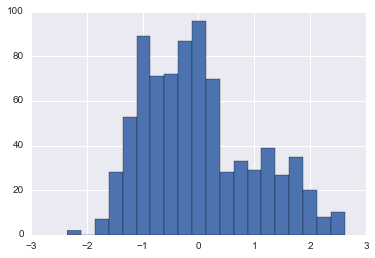

In [90]:
results_log = results_log.resid_pearson
hist(results_log, bins=20);

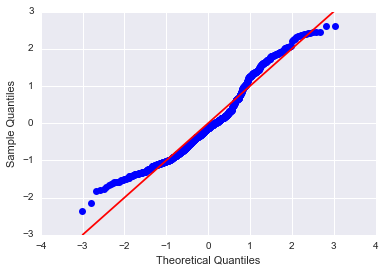

In [89]:
sres4 = results_log.resid_pearson
qqplot(sres4)
q = linspace(-3, 3)
plot(q, q, color='r')
show()

>The normality is improved.

We can see improved linearity, heteroskedastic.

$H_0$: constant variance  

$H_1$: non-constant variance  

A small p-value gives evidence for non-constant variance (heteroskedasticity).

In [93]:
het_breushpagan(results3.resid, results3.model.exog)

(177.05806036958774,
 8.1426571642331505e-35,
 32.114665796251778,
 2.2608172722008548e-39)

>The p-value is 8.1426571642331505e-35, we would reject constant variance.

4) As a rule of thumb, the fewer variables there are in a model, the easier it is to interpret the model. Use your judgement and remove features which you think are of little practical importance and have coefficients that are statistically insignificant.

   

In [140]:
X31 = car[['mileage','cruise','leather','liter','doors']]
X31 = sms.add_constant(X31)
y31 = car['price']

model31 = sms.OLS(y31, X31)
results31 = model31.fit()
results31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           3.95e-90
Time:                        16:08:44   Log-Likelihood:                -8321.3
No. Observations:                 804   AIC:                         1.665e+04
Df Residuals:                     798   BIC:                         1.668e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9627.0406   1646.730      5.846      0.000      6394.607  1.29e+04
mileage       -0.1731      0.033     -5.290      0.000        -0.237    -0.109
cruise      6328.8646    674.745      9.380      0.000      5004.379  7653.350
leather     2955.9643    605.920      4.878      0.000      1766.579  4145.350
liter       3868.2577    264.253     14.638      0.000      3349.545  4386.971
doors       -993.1607    316.705     -3.136      0.002     -1614.834  -371.487
==============================================================================
Omnibus:                      189.801   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.308
Skew:                           1.278   Prob(JB):                     1.98e-92
Kurtosis:                       5.464   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>There is no improvement from new model, so test another new model.

In [141]:
X32 = car[['mileage','cruise','liter','doors']]
X32 = sms.add_constant(X32)
y32 = car['price']

model32 = sms.OLS(y32, X32)
results32 = model32.fit()
results32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           3.75e-86
Time:                        16:09:59   Log-Likelihood:                -8333.1
No. Observations:                 804   AIC:                         1.668e+04
Df Residuals:                     799   BIC:                         1.670e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.188e+04   1603.197      7.409      0.000      8730.431   1.5e+04
mileage       -0.1722      0.033     -5.190      0.000        -0.237    -0.107
cruise      5954.8306    679.873      8.759      0.000      4620.283  7289.378
liter       4022.5429    266.070     15.118      0.000      3500.263  4544.823
doors      -1082.5582    320.654     -3.376      0.001     -1711.981  -453.135
==============================================================================
Omnibus:                      196.433   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.738
Skew:                           1.323   Prob(JB):                     8.84e-96
Kurtosis:                       5.464   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>There is no improvement from new model, so test another new model.
<br>
Since eliminating varialbes are not improve model fit, so the original model with is the best model.
<br>
The original model not only can predict with all other variables, but also it has less than 0.05 p-value.

5) (Extra Credit) Run outlier diagnostics in order to identify and explain outliers of the model.

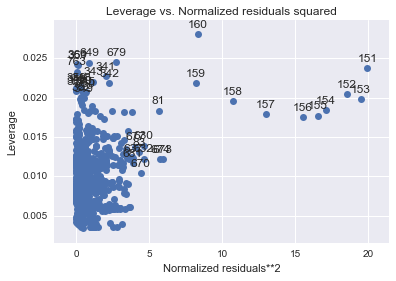

In [95]:
plot_leverage_resid2(results3);

>There is some outliers from 151 to 160.

In [108]:
view_outliers = []
for i in range(151,161):
    view_outliers.append(car_price[car_price.index == i])
view_outliers

[     car_id         price  mileage      make   model             trim  cruise  \
 151     150  70755.466717      583  Cadillac  XLR-V8  Hardtop Conv 2D       1   
 
      sound  leather  
 151      1        1  ,
      car_id         price  mileage      make   model             trim  cruise  \
 152     151  68566.187189     6420  Cadillac  XLR-V8  Hardtop Conv 2D       1   
 
      sound  leather  
 152      1        1  ,
      car_id         price  mileage      make   model             trim  cruise  \
 153     152  69133.731722     7892  Cadillac  XLR-V8  Hardtop Conv 2D       1   
 
      sound  leather  
 153      1        1  ,
      car_id        price  mileage      make   model             trim  cruise  \
 154     153  66374.30704    12021  Cadillac  XLR-V8  Hardtop Conv 2D       1   
 
      sound  leather  
 154      1        1  ,
      car_id         price  mileage      make   model             trim  cruise  \
 155     154  65281.481237    15600  Cadillac  XLR-V8  Hardtop Conv 

>They are all Cadillac model XLR-V8 hardtop conv with prices ranging about from mid $\$50,000$ to $\$70,000$.